In [1]:
import numpy as np
import pandas as pd
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn_extensions.fuzzy_kmeans import FuzzyKMeans
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
df=pd.read_csv("my_all_tracks_2019")
tracks=df[df.columns[0:23]]
audio_features=df[np.append(df.columns[23:31],"track.duration")]
signal_features=df[df.columns[31:len(df.columns)]]
#print(tracks.shape, audio_features.shape,signal_features.shape)
n=audio_features.shape[0]
generos=df["track.genre1"]
etiquetas=generos.astype('category').cat.codes 
dic = {etiquetas[i]: generos[i] for i in range(len(generos))} 
markers=['^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'D', 'd', '|']
mark=[]
for i in range(len(etiquetas)):
    mark.append(markers[etiquetas[i]])
dic1 = {mark[i]: generos[i] for i in range(len(generos))} 

<Figure size 468x381.6 with 0 Axes>

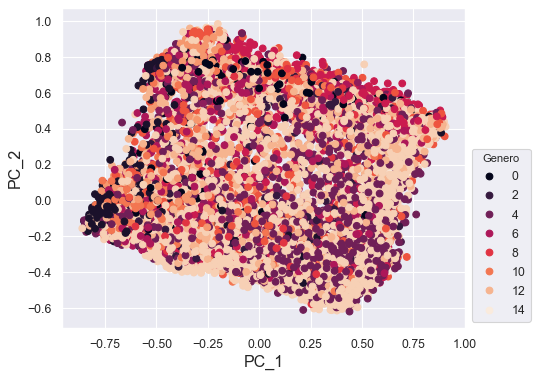

In [3]:

x = audio_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
audio_features_scal = pd.DataFrame(x_scaled)

pca = PCA(n_components=2)
pc = pca.fit_transform(audio_features_scal)
sns.set_palette("gnuplot",n_colors=n)
plt.figure(figsize=(6.5, 5.3))
dkm = {'PC1': pc[:,0],'PC2': pc[:,1], "Label":etiquetas+1}
fig = plt.figure(num=None, figsize=(6.5, 5.3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
scatter=plt.scatter(pc[:,0],pc[:,1],c=etiquetas)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),loc="lower left", title="Genero", bbox_to_anchor=(1, 0))
plt.xlabel("PC_1",fontsize="x-large")
plt.ylabel("PC_2",fontsize="x-large")
#plt.legend(loc="best")
plt.show()

In [4]:
for i in range(len(dic)):
    print(i,"&",dic[i],str("\\"+"\\"))

0 & Blues \\
1 & Classical \\
2 & Country \\
3 & Easy Listening \\
4 & Electronic \\
5 & Experimental \\
6 & Folk \\
7 & Hip-Hop \\
8 & Instrumental \\
9 & International \\
10 & Jazz \\
11 & Old-Time / Historic \\
12 & Pop \\
13 & Rock \\
14 & Soul-RnB \\


In [6]:
# x = audio_features.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# audio_features_scal = pd.DataFrame(x_scaled)

# pca = PCA(n_components=2)
# pc = pca.fit_transform(audio_features_scal)
# sns.set_palette("gnuplot",n_colors=n)
# plt.figure(figsize=(6.5, 5.3))
# dkm = {'PC1': pc[:,0],'PC2': pc[:,1], "Label":etiquetas+1}
# plt.scatter(pc[:,0],pc[:,1],c=etiquetas)
# plt.xlabel("PC_1",fontsize="x-large")
# plt.ylabel("PC_2",fontsize="x-large")
# #plt.legend(loc="best")
# plt.show()

In [7]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.figure(figsize=(6.5, 5.3))
# dkm = {'PC1': pc[:,0],'PC2': pc[:,1], "Label":etiquetas+1}
# plt.scatter(pc[:,0],pc[:,1],c=etiquetas)
# plt.xlabel("PC_1",fontsize="x-large")
# plt.ylabel("PC_2",fontsize="x-large")
# plt.show()

<Figure size 468x381.6 with 0 Axes>

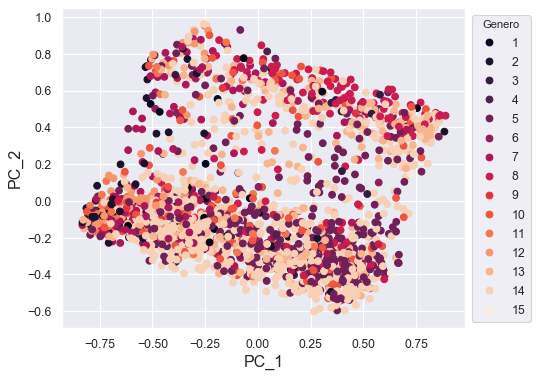

In [8]:
df_pc = pd.DataFrame({'PC1': pc[:,0],'PC2': pc[:,1],"Actual label":etiquetas+1,'Genero': generos,"Marcador":mark})
sample=df_pc.sample(2000,random_state=1)

plt.figure(figsize=(6.5, 5.3))
fig = plt.figure(num=None, figsize=(6.5, 5.3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
scatter=plt.scatter(sample.PC1,sample.PC2,c=sample["Actual label"])
# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),loc="lower left", title="Genero", bbox_to_anchor=(1, 0))
plt.xlabel("PC_1",fontsize="x-large")
plt.ylabel("PC_2",fontsize="x-large")
#plt.legend(loc="best")
plt.show()

In [9]:
from sklearn_extensions.fuzzy_kmeans import KMedians, FuzzyKMeans, KMeans

def spc(df,G):
    pc=df[["PC1","PC2"]].to_numpy()
    generos=df["Genero"].to_numpy()
    marks=df["Marcador"].to_numpy()
    etiquetas=df["Actual label"].to_numpy()
    sns.color_palette("hls")
    #clustering = SpectralClustering(n_clusters=len(set(generos)),assign_labels="discretize",random_state=0,gamma=G).fit(pc)
    clustering = SpectralClustering(n_clusters=8,assign_labels="discretize",random_state=0,gamma=G).fit(pc)
    dclust = {'PC1': pc[:,0],'PC2': pc[:,1], 'Label': clustering.labels_+1,"Actual label":etiquetas+1,'Genero': generos,'Marcador': marks}
    df_clust = pd.DataFrame(data=dclust)
    fig = plt.figure(num=None, figsize=(6.5, 5.3), dpi=80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    marcadores=list(set(df_clust["Marcador"].values))
    marc=marcadores[0]
    marcadores.remove(marc)
    aux=df_clust[df_clust["Marcador"]==marc]
    scatter = ax.scatter(aux['PC1'], aux['PC2'], c=aux['Label'],marker=marc)
    for marc in marcadores:
        aux=df_clust[df_clust["Marcador"]==marc]
        plt.scatter(aux['PC1'], aux['PC2'], c=aux['Label'],marker=marc)
    
    # produce a legend with the unique colors from the scatter
    legend = ax.legend(*scatter.legend_elements(),loc="lower left", title="Genero", bbox_to_anchor=(1, 0))
    #ax.add_artist(legend)
    plt.xlabel("PC_1",fontsize="x-large")
    plt.ylabel("PC_2",fontsize="x-large")
    plt.title("Spectral Clustering $\gamma$="+str(G),fontsize="xx-large")
    plt.show()
    #return df_clust
    
def Fkm(df):
    pc=df[["PC1","PC2"]].to_numpy()
    generos=df["Genero"].to_numpy()
    marks=df["Marcador"].to_numpy()
    etiquetas=df["Actual label"].to_numpy()
    
    #fkm = FuzzyKMeans(k=len(set(generos)),m=2).fit(pc)
    fkm = FuzzyKMeans(k=8,m=2).fit(pc)
    dfkm = {'PC1': pc[:,0],'PC2': pc[:,1], 'Label': fkm.labels_+1,"Actual label":etiquetas+1,'Genero': generos,'Marcador': marks}
    df_fkm = pd.DataFrame(data=dfkm)
    
    fig = plt.figure(num=None, figsize=(6.5, 5.3), dpi=80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    marcadores=list(set(df_fkm["Marcador"].values))
    marc=marcadores[0]
    marcadores.remove(marc)
    aux=df_fkm[df_fkm["Marcador"]==marc]
    scatter = ax.scatter(aux['PC1'], aux['PC2'], c=aux['Label'],marker=marc)
   
    for marc in marcadores:
        aux=df_fkm[df_fkm["Marcador"]==marc]
        plt.scatter(aux['PC1'], aux['PC2'], c=aux['Label'],marker=marc)
    
    # produce a legend with the unique colors from the scatter
    legend = ax.legend(*scatter.legend_elements(),loc="lower left", title="Genero", bbox_to_anchor=(1, 0))
    #ax.add_artist(legend)
    cent=fkm.cluster_centers_
    #res = pd.DataFrame(np.round(fuzzy_kmeans.fuzzy_labels_,3)).assign(label=fuzzy_kmeans.labels_)
    plt.scatter(cent[:,0],cent[:,1],c="#37b8bd",marker="d",s=80)
    plt.title("Fuzzy K-means",fontsize="x-large")
    plt.xlabel("PC_1",fontsize="x-large")
    plt.ylabel("PC_2",fontsize="x-large")

    plt.show()

def Km(df):
    pc=df[["PC1","PC2"]].to_numpy()
    generos=df["Genero"].to_numpy()
    marks=df["Marcador"].to_numpy()
    etiquetas=df["Actual label"].to_numpy()
    
    #kmeans = KMeans(n_clusters=len(set(generos)), random_state=0).fit(pc)
    kmeans = KMeans(k=8, random_state=0).fit(pc)
    dkm = {'PC1': pc[:,0],'PC2': pc[:,1], 'Label': kmeans.labels_+1,"Actual label":etiquetas+1,'Genero': generos,'Marcador': marks}
    df_km = pd.DataFrame(data=dkm)
    
    fig = plt.figure(num=None, figsize=(6.5, 5.3), dpi=80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    marcadores=list(set(df_km["Marcador"].values))
    marc=marcadores[0]
    marcadores.remove(marc)
    aux=df_km[df_km["Marcador"]==marc]
    scatter = ax.scatter(aux['PC1'], aux['PC2'], c=aux['Label'],marker=marc)
   
    for marc in marcadores:
        aux=df_km[df_km["Marcador"]==marc]
        plt.scatter(aux['PC1'], aux['PC2'], c=aux['Label'],marker=marc)
    
    # produce a legend with the unique colors from the scatter
    legend = ax.legend(*scatter.legend_elements(),loc="lower left", title="Genero", bbox_to_anchor=(1, 0))
    #ax.add_artist(legend)
    cent=kmeans.cluster_centers_
    #res = pd.DataFrame(np.round(fuzzy_kmeans.fuzzy_labels_,3)).assign(label=fuzzy_kmeans.labels_)
    plt.scatter(cent[:,0],cent[:,1],c="#37b8bd",marker="d",s=80)
    plt.title("K-means",fontsize="x-large")
    plt.xlabel("PC_1",fontsize="x-large")
    plt.ylabel("PC_2",fontsize="x-large")

    plt.show()


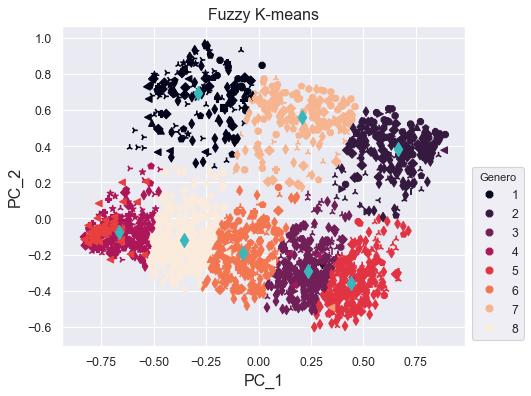

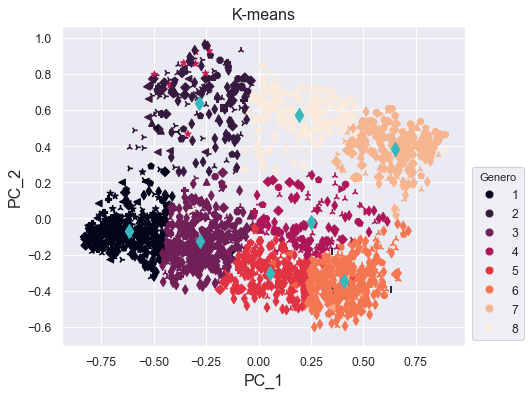

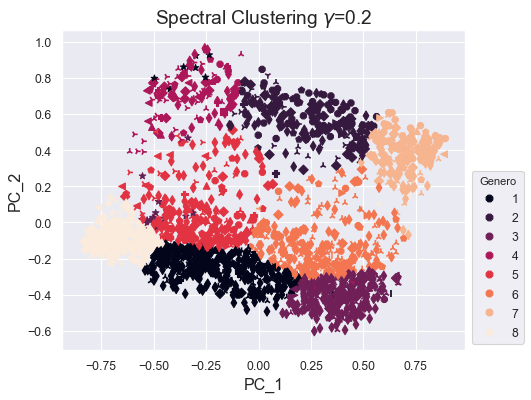

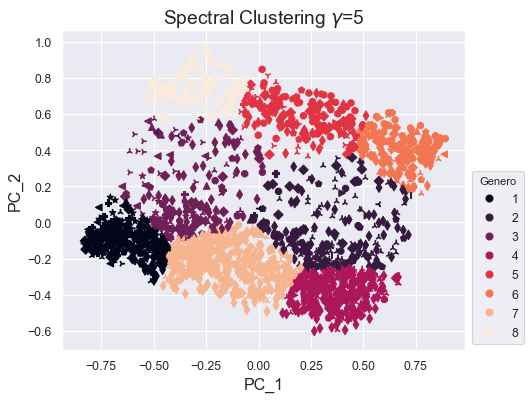

In [10]:
Fkm(sample)
Km(sample)
spc(sample,0.2)
spc(sample,5)

In [11]:
#To determine categories
print(max(audio_features["audio_features.danceability"])/3,max(audio_features["audio_features.energy"])/3)
#To tag them 
def categorize_resp(yi):
    n=len(yi)
    y_cat=np.zeros(n)
    categories=[0.35,0.65,1]
    for i in range(n):
        if (yi[i]<categories[0]):
            y_cat[i]=0
        elif (categories[0]<yi[i]<categories[1]):
            y_cat[i]=1
        else:
            y_cat[i]=2
    return y_cat.astype(int)

0.3228815539 0.3333212369333333


In [12]:
sample=df.sample(1500,random_state=1)
signal_features=sample[sample.columns[31:len(sample.columns)]]

In [13]:
#To Get train, test and validation sets
temp=signal_features.var(axis=0)
to_drop=temp[temp<=1].index
sample=df.sample(5000,random_state=1)
signal_features=sample[sample.columns[31:len(sample.columns)]]
y=sample[["audio_features.danceability","audio_features.energy"]].values
#y=df[["audio_features.danceability","audio_features.energy"]].values
X=signal_features.drop(to_drop,axis=1).values
from sklearn.preprocessing import StandardScaler
#Estandarizando
scaler = StandardScaler(with_mean=True,with_std=True)
X_scale = scaler.fit_transform(X)
#y_scale = scaler.fit_transform(y)
y_cat=np.vstack((np.array([categorize_resp(y[:,0])]), np.array([categorize_resp(y[:,1])]))).T
#X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.33, random_state=42)

X_train, X_aux, y_train, y_aux = train_test_split(X, y_cat, test_size=0.33, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_aux, y_aux, test_size=0.33, random_state=42)
y1_train,y1_test,y1_valid=y_train[:,0],y_test[:,0],y_valid[:,0]
y2_train,y2_test,y2_valid=y_train[:,1],y_test[:,1],y_valid[:,1]


In [14]:

def train_lda(X_train,X_test,y_train,y_test):
    lf = LDA()
    lf.fit(X_train, y_train)
    Y_train=lf.predict(X_train)
    print("Train error LDA:",(1-sum(Y_train==y_train)/np.shape(y_train))*100)
    Y_predic=lf.predict(X_test)
    print("Test error LDA:",(1-sum(Y_predic==y_test)/np.shape(y_test))*100)
    #print(Y_predic,y_test)
def train_qda(X_train,X_test,y_train,y_test):
    clf = QDA()
    clf.fit(X_train, y_train)
    Y_train=clf.predict(X_train)
    #print("training score:",clf.score(X_train, y_train))
    print("Train error QDA:",(1-sum(Y_train==y_train)/np.shape(y_train))*100)
    Y_predic=clf.predict(X_test)
    print("Test error QDA:",(1-sum(Y_predic==y_test)/np.shape(y_test))*100)
    #print(Y_predic,y_test)
def train_logit(X_train,X_test,y_train,y_test):
    #clf =  LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
    #clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,multi_class=multi_class)
    clf = LogisticRegression(solver='sag', max_iter=200, random_state=42,multi_class="multinomial")
    clf.fit(X_train, y_train)
    Y_train=clf.predict(X_train)
    print("Train error Logit:",(1-sum(Y_train==y_train)/np.shape(y_train))*100)
    Y_predic=clf.predict(X_test)
    print("Test error Logit:",(1-sum(Y_predic==y_test)/np.shape(y_test))*100)

def neural_net(X_train,X_test,y_train,y_test):
    #clf = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500,activation = "logistic",solver='lbfgs',random_state=1)
    hls = [212,12,3]
    a = .1
    clf=MLPClassifier(solver='lbfgs', hidden_layer_sizes=hls, random_state=0,max_iter=200, alpha=a,activation = "logistic")
    clf.fit(X_train, y_train)
    Y_train=clf.predict(X_train)
    print("Train error NN:",(1-sum(Y_train==y_train)/np.shape(y_train))*100)
    Y_predic=clf.predict(X_test)
    print("Test error NN:",(1-sum(Y_predic==y_test)/np.shape(y_test))*100)


In [16]:
def train_lda(X_train,X_test,y_train,y_test):
    lf = LDA()
    lf.fit(X_train, y_train)
    Y_train=lf.predict(X_train)
    print("Train error LDA:",(1-sum(Y_train==y_train)/np.shape(y_train))*100)
    Y_predic=lf.predict(X_test)
    print("Test error LDA:",(1-sum(Y_predic==y_test)/np.shape(y_test))*100)

train_lda(X_train,X_test,y1_train,y1_test)

for i in range(len(sample)):
    print((df.file[sample[i]]+" & "+str(y1_lda[sample[i]])+" & "+str(y1_logit[sample[i]])+" &  "+" & "+str(y2_lda[sample[i]]))+" & "+str(y2_logit[sample[i]])+" &  "+"\\"+"\\")

Train error LDA: [33.49253731]
Test error LDA: [37.73755656]


AttributeError: 'DataFrame' object has no attribute 'file'

In [15]:
df = pd.DataFrame({'name': ['Raphael', 'Donatello'],
                   'mask': ['red', 'purple'],
                   'weapon': ['sai', 'bo staff']})
df
print(df.to_latex(index=False))  


\begin{tabular}{lll}
\toprule
      name &    mask &    weapon \\
\midrule
   Raphael &     red &       sai \\
 Donatello &  purple &  bo staff \\
\bottomrule
\end{tabular}



In [61]:
print("y1:")
train_lda(X_train,X_test,y1_train,y1_test)
train_qda(X_train,X_test,y1_train,y1_test)
train_logit(X_train,X_test,y1_train,y1_test)
neural_net(X_train,X_test,y1_train,y1_test)
print("y2:")
train_lda(X_train,X_test,y2_train,y2_test)
train_qda(X_train,X_test,y2_train,y2_test)
train_logit(X_train,X_test,y2_train,y2_test)
neural_net(X_train,X_test,y2_train,y2_test)

y1:
Train error LDA: [33.2238806]
Test error LDA: [38.73303167]
Train error QDA: [15.76119403]
Test error QDA: [46.06334842]


C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train error Logit: [39.79104478]
Test error Logit: [38.82352941]
Train error NN: [45.37313433]
Test error NN: [46.96832579]
y2:
Train error LDA: [22.74626866]
Test error LDA: [29.23076923]
Train error QDA: [13.67164179]
Test error QDA: [39.45701357]


C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train error Logit: [27.70149254]
Test error Logit: [32.48868778]
Train error NN: [44.11940299]
Test error NN: [45.24886878]


In [1160]:
#Probando con PCA
pca = PCA(n_components=2)
pca.fit(X_train)
pc_train = pca.transform(X_train)
pc_test = pca.transform(X_test)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.scatter(X[:,0],X[:,1],c=etiquetas)

train_lda(pc_train,pc_test,y1_train,y1_test)
train_lda(pc_train,pc_test,y2_train,y2_test)
train_qda(pc_train,pc_test,y1_train,y1_test)
train_qda(pc_train,pc_test,y2_train,y2_test)
train_logit(pc_train,pc_test,y1_train,y1_test)
train_logit(pc_train,pc_test,y2_train,y2_test)
neural_net(pc_train,pc_test,y1_train,y1_test)
neural_net(pc_train,pc_test,y2_train,y2_test)


Train error LDA: [47.64179104]
Test error LDA: [48.72727273]
Train error LDA: [45.04477612]
Test error LDA: [46.12121212]
Train error QDA: [47.58208955]
Test error QDA: [48.66666667]
Train error QDA: [45.97014925]
Test error QDA: [45.33333333]
Train error Logit: [68.17910448]
Test error Logit: [65.81818182]
Train error Logit: [50.3880597]
Test error Logit: [50.84848485]
Train error NN: [47.73134328]
Test error NN: [48.66666667]
Train error NN: [46.98507463]
Test error NN: [48.78787879]


In [1181]:
df_val=pd.read_csv("my_all_tracks_No_genre_2019")
signal_features_val=df_val[df_val.columns[13:len(df_val.columns)]]
temp=signal_features_val.var(axis=0)
to_drop=temp[temp<=1].index
X_val=signal_features.drop(to_drop,axis=1).values

In [1190]:
def predic_lda(X_train,X_test,y_train):
    lf = LDA().fit(X_train, y_train)
    Y_predic=lf.predict(X_test)
    return(Y_predic)

def predic_logit(X_train,X_test,y_train):
    clf = LogisticRegression(solver='sag', max_iter=200, random_state=42,multi_class="multinomial").fit(X_train, y_train)
    Y_predic=clf.predict(X_test)
    return(Y_predic)


In [1192]:
y1_lda=predic_lda(X_train,X_val,y1_train)
y1_logit=predic_logit(X_train,X_val,y1_train)

y2_lda=predic_lda(X_train,X_val,y2_train)
y2_logit=predic_logit(X_train,X_val,y1_train)


C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [1237]:
import random
sample=[]
for i in range(4):
    sample.append(random.randrange(0, len(y1_lda)))


In [1238]:

print(y1_lda[sample])
print(y2_lda[sample])
print(y1_logit[sample])
print(y2_logit[sample])
print(df.file[sample])

[2 1 2 1]
[2 2 2 1]
[1 1 1 1]
[1 1 1 1]
2538    fma_large/010/010802.mp3
3014    fma_large/012/012152.mp3
2785    fma_large/011/011684.mp3
993     fma_large/003/003444.mp3
Name: file, dtype: object


In [1239]:
for i in range(len(sample)):
    print((df.file[sample[i]]+" & "+str(y1_lda[sample[i]])+" & "+str(y1_logit[sample[i]])+" &  "+" & "+str(y2_lda[sample[i]]))+" & "+str(y2_logit[sample[i]])+" &  "+"\\"+"\\")

fma_large/010/010802.mp3 & 2 & 1 &   & 2 & 1 &  \\
fma_large/012/012152.mp3 & 1 & 1 &   & 2 & 1 &  \\
fma_large/011/011684.mp3 & 2 & 1 &   & 2 & 1 &  \\
fma_large/003/003444.mp3 & 1 & 1 &   & 1 & 1 &  \\
